In [3]:
import numpy as np
import skimage.data as imgdata
import matplotlib.pyplot as plt

def computeDyad(U, S, VT, i): 
    return S[i]*(U[:, i:i+1]@VT[i:i+1, :])

def k_rank_approximation(U, S, VT, k):
    res = computeDyad(U, S, VT, 0)
    for i in range(1, k):
        res += computeDyad(U, S, VT, i)
    return res

def computeError(U, S, VT, k):
    res = computeDyad(U, S, VT, k)
    for i in range(k+1, len(S)):
        res += S[i]*(U[:, i:i+1]@VT[i:i+1, :])
    return np.linalg.norm(res, 2)


def computeCompressionFactor(m,n,k):
    return k/(m*n)

In [1]:
def exec(img):
    print("Original image")
    plt.imshow(img, cmap='gray')
    plt.show()

    m, n = img.shape

    U, S, VT = np.linalg.svd(img, full_matrices=False)


    # for i in range(5):
    #     print(computeDyad(U, S, VT, i))

    # plot the singularvalues of X
    print("First tenth singular values: ", S[:10])

    # Visualize the k-rank approximation of X for different values of k.
    xs = [2,5,10,20, 50, 200]

    plt.figure(figsize=(10, 10))

    A = k_rank_approximation(U, S, VT, xs[0])
    plt.subplot(2, 2, 1)
    plt.imshow(A, cmap='gray')

    A = k_rank_approximation(U, S, VT, xs[1])
    plt.subplot(2, 2, 2)
    plt.imshow(A, cmap='gray')

    A = k_rank_approximation(U, S, VT, xs[2])
    plt.subplot(2, 2, 3)
    plt.imshow(A, cmap='gray')

    A = k_rank_approximation(U, S, VT, xs[3])
    plt.subplot(2, 2, 4)
    plt.imshow(A, cmap='gray')
    plt.show()

    plt.figure(figsize=(10,10))
    A = k_rank_approximation(U, S, VT, xs[4])
    plt.subplot(1,2,1)
    plt.imshow(A, cmap='gray')

    A = k_rank_approximation(U, S, VT, xs[5])
    plt.subplot(1,2,2)
    plt.imshow(A, cmap='gray')
    plt.show()


    errs = []
    for i in xs:
        errs.append(computeError(U, S, VT, i))

    print(f"errors increaing k: {errs}")

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('K')
    ax1.set_ylabel('error', color=color)
    ax1.plot(xs, errs, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('singular value', color=color)  # we already handled the x-label with ax1
    ax2.plot(xs, S[:len(xs)], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    #ax2.set_ylim(0, 1)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

    # plt.plot(xs, errs)
    # plt.plot(xs, S[:6], 'r')
    # plt.title('Errors')
    # plt.xlabel('k')
    # plt.ylabel('error')
    # plt.grid()
    # plt.show()

    for i in xs:
        print("Compression factor for ", i, ": ", computeCompressionFactor(m,n,i))

Original image


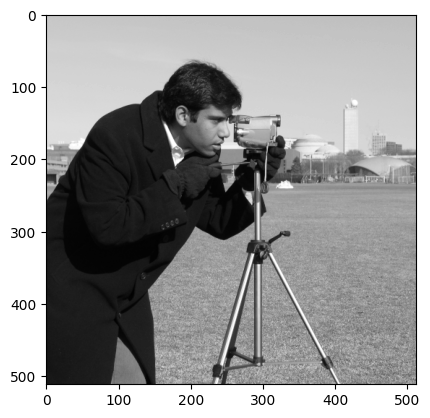

First tenth singular values:  [70966.03483872 17054.5910748  13314.90060259  8837.41448185
  5874.62439417  4350.94629303  3729.07962631  3474.87862817
  3411.84114657  3030.67422603]


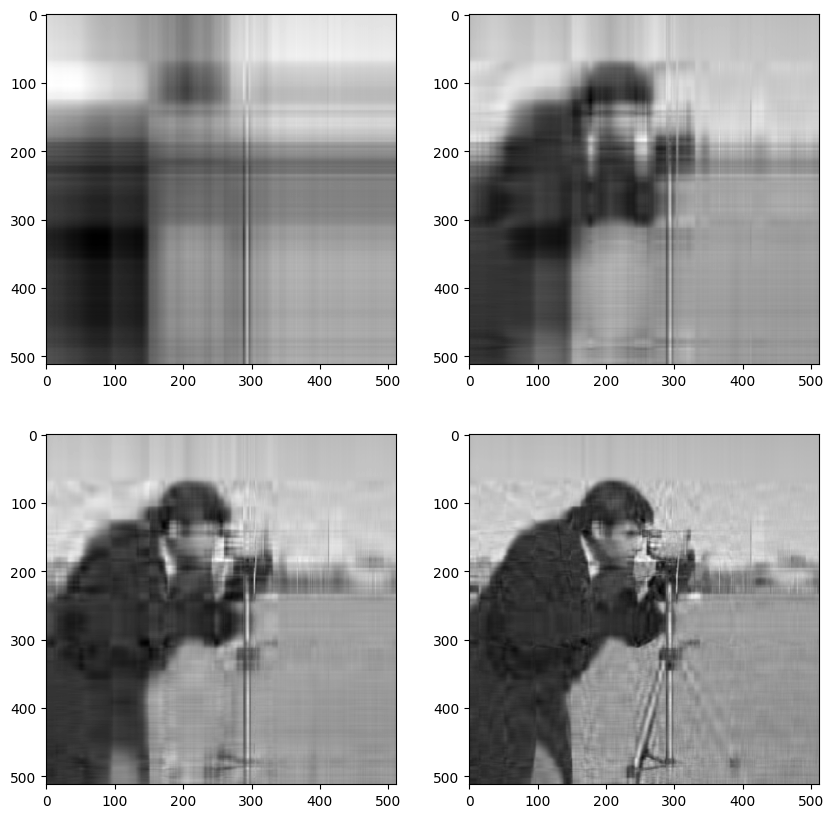

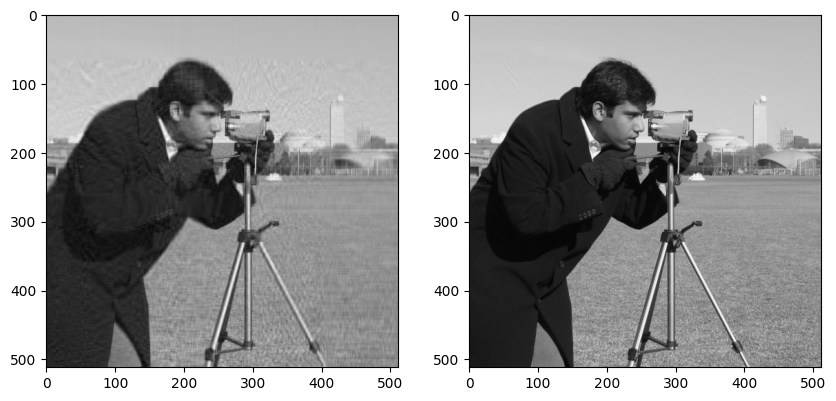

errors increaing k: [13314.900602590924, 4350.946293025327, 2717.5041342987947, 1656.6681356502202, 746.0164192850157, 174.32826490442434]


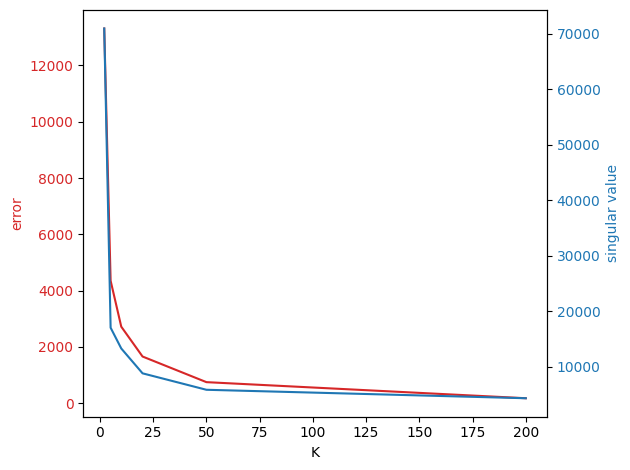

Compression factor for  2 :  7.62939453125e-06
Compression factor for  5 :  1.9073486328125e-05
Compression factor for  10 :  3.814697265625e-05
Compression factor for  20 :  7.62939453125e-05
Compression factor for  50 :  0.00019073486328125
Compression factor for  200 :  0.000762939453125


In [4]:
exec(img = imgdata.camera())


Original image


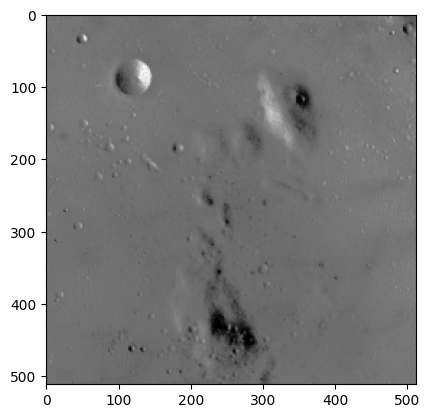

First tenth singular values:  [57535.05028469  3171.5853362   2424.947361    2333.24842114
  1667.73427451  1117.44303835   966.97327509   884.81784151
   751.98018418   724.30062814]


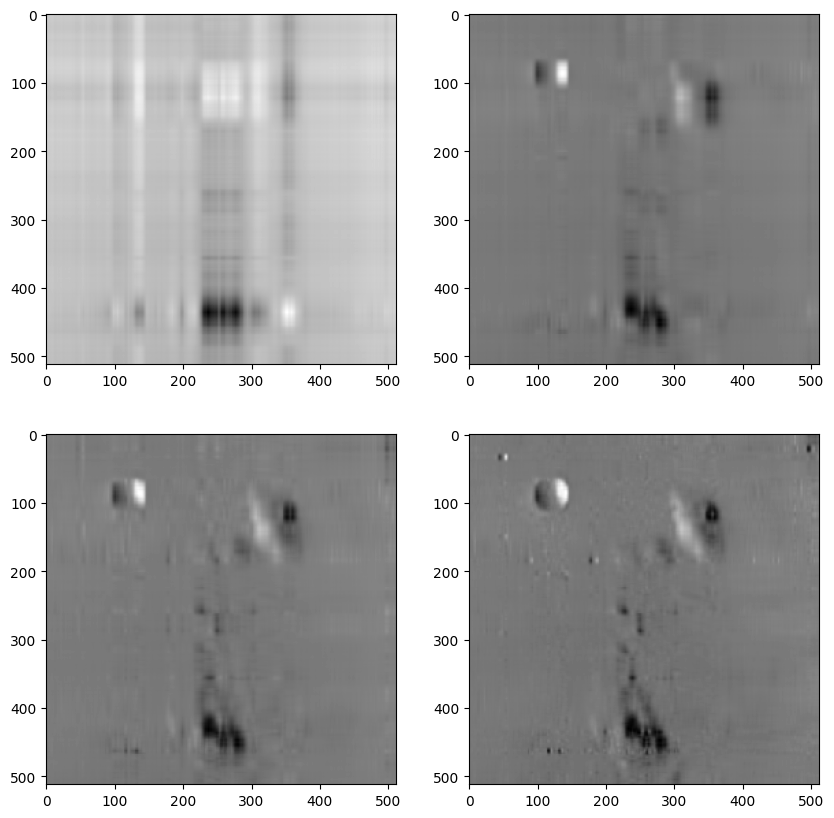

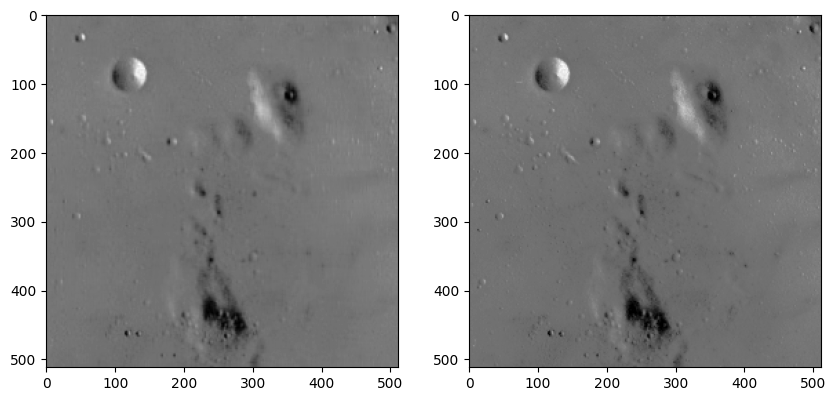

errors increaing k: [2424.9473609989627, 1117.4430383512038, 710.9157879178307, 393.7013719470706, 184.35420682110433, 24.049051136888373]


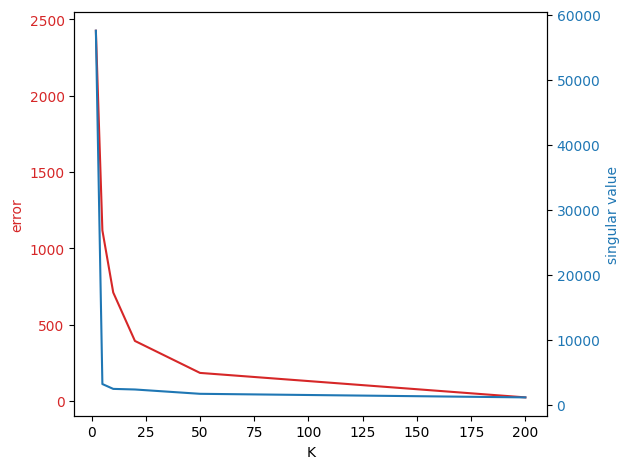

Compression factor for  2 :  7.62939453125e-06
Compression factor for  5 :  1.9073486328125e-05
Compression factor for  10 :  3.814697265625e-05
Compression factor for  20 :  7.62939453125e-05
Compression factor for  50 :  0.00019073486328125
Compression factor for  200 :  0.000762939453125


In [5]:
exec(imgdata.moon())